In [1]:
import pandas as pd
import numpy as np

import keras
pd.options.display.max_rows = 10

%matplotlib inline
import matplotlib.pyplot as plt

/home/rahul/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df_train = pd.read_csv("mnist_train.csv")
df_test = pd.read_csv("mnist_test.csv")

In [3]:
df_train.shape


(59999, 785)

In [4]:
df_train.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


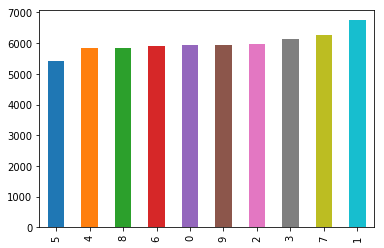

In [5]:
# Counting each number data
df_train["5"].value_counts().sort_values(ascending = True).plot.bar()

In [13]:
#Use values to call reshape later
x_train = df_train.iloc[ :,1:].values/255
y_train = df_train.iloc[ :,:1]

x_test = df_test.iloc[:,1:].values/255
y_test = df_test.iloc[ :,:1]

In [7]:
y_test["7"].value_counts()

1    1135
2    1032
7    1027
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: 7, dtype: int64

In [8]:
#Creating model
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

In [10]:
model = keras.Sequential()
model.add(keras.layers.InputLayer((28, 28, 1))) 

model.add(keras.layers.Conv2D(32, (5, 5), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(400, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               640400    
__________

In [14]:
#Reshaping the row into a 28 * 28 * 1 matrix for input

model.fit(x_train.reshape((-1, 28, 28, 1)), Y_train
          , batch_size=128
          , validation_data=(x_test.reshape((-1, 28, 28, 1)), Y_test)
          , epochs=5)


Train on 59999 samples, validate on 9999 samples
Epoch 1/5
59999/59999 [==============================] - 63s 1ms/step - loss: 0.1790 - acc: 0.9459 - val_loss: 0.0487 - val_acc: 0.9838
Epoch 2/5
59999/59999 [==============================] - 62s 1ms/step - loss: 0.0446 - acc: 0.9862 - val_loss: 0.0332 - val_acc: 0.9890
Epoch 3/5
59999/59999 [==============================] - 62s 1ms/step - loss: 0.0305 - acc: 0.9905 - val_loss: 0.0290 - val_acc: 0.9905
Epoch 4/5
59999/59999 [==============================] - 62s 1ms/step - loss: 0.0241 - acc: 0.9922 - val_loss: 0.0333 - val_acc: 0.9881
Epoch 5/5
59999/59999 [==============================] - 63s 1ms/step - loss: 0.0181 - acc: 0.9944 - val_loss: 0.0250 - val_acc: 0.9913


In [28]:
x_cv = df_train.iloc[ 2:3,1:]
x_cv.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


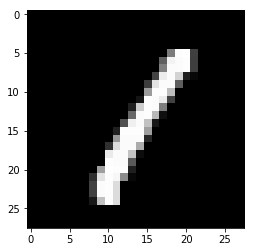

In [30]:
plt.imshow(x_cv.values.reshape((28, 28)), cmap = "gray")

In [33]:
model.predict(x_cv.values.reshape(-1,28,28,1))

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)